#Import Using API

In [ ]:
#https://data.seattle.gov/resource/tazs-3rd5.json

In [ ]:
!pip install sodapy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#from sodapy import Socrata


In [ ]:
#client = Socrata("data.cityofchicago.org", None)
client = Socrata("https://data.seattle.gov/resource/tazs-3rd5.json", None)


In [ ]:
#results = client.get("tazs-3rd5", limit=2000)


In [ ]:
results_df = pd.DataFrame.from_records(results)


#Import Data

In [ ]:
police_sea = pd.read_csv('https://data.seattle.gov/resource/tazs-3rd5.csv')

In [ ]:
police_sea['offense_start_datetime'] = pd.to_datetime(police_sea['offense_start_datetime'])
police_sea['offense_end_datetime'] = pd.to_datetime(police_sea['offense_end_datetime'])
police_sea['report_datetime'] = pd.to_datetime(police_sea['report_datetime'])

In [ ]:
police_sea.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,_100_block_address,longitude,latitude
0,2020-044620,12605873663,2020-02-05 10:10:00,NaT,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,2020-02-05 00:51:21,NaT,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [ ]:
police_sea = police_sea.sort_values('offense_start_datetime',ascending=True)

#EDA

##Null Values and Info

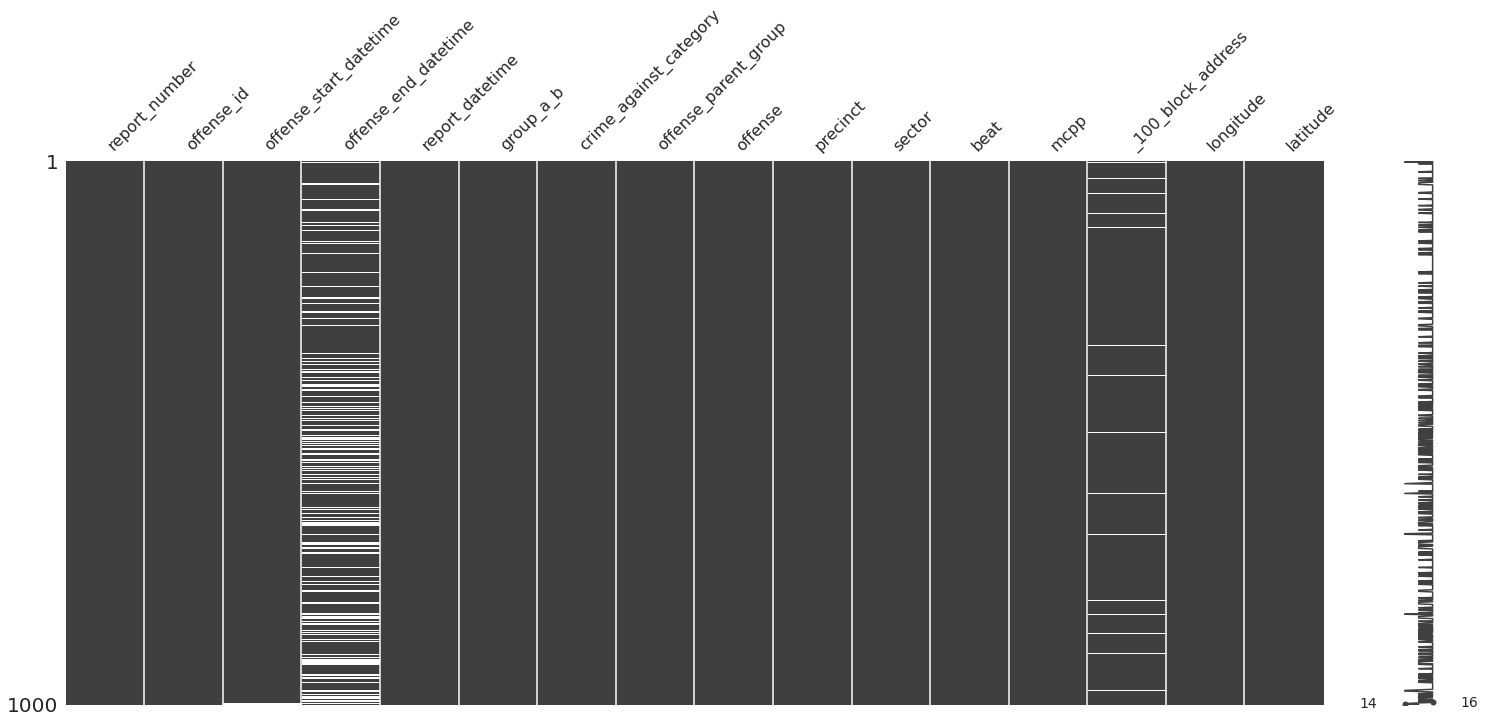

In [ ]:
import missingno as msno
msno.matrix(police_sea);

In [ ]:
police_sea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 374 to 425
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   report_number           1000 non-null   object        
 1   offense_id              1000 non-null   int64         
 2   offense_start_datetime  997 non-null    datetime64[ns]
 3   offense_end_datetime    753 non-null    datetime64[ns]
 4   report_datetime         1000 non-null   datetime64[ns]
 5   group_a_b               1000 non-null   object        
 6   crime_against_category  1000 non-null   object        
 7   offense_parent_group    1000 non-null   object        
 8   offense                 1000 non-null   object        
 9   offense_code            1000 non-null   object        
 10  precinct                1000 non-null   object        
 11  sector                  1000 non-null   object        
 12  beat                    1000 non-null   object 

##Numerical Values

In [ ]:
police_sea.describe()

,offense_id,longitude,latitude,mult_offense
count,1.000000e+03,1000.000000,1000.000000,1000.00000
mean,1.247484e+10,-119.765672,46.620877,0.05800
std,1.334323e+08,17.549652,6.831681,0.23386
min,1.224742e+10,-122.412698,0.000000,0.00000
25%,1.233898e+10,-122.353791,47.589665,0.00000
50%,1.249815e+10,-122.333238,47.615235,0.00000
75%,1.260038e+10,-122.316511,47.661404,0.00000
max,1.260587e+10,0.000000,47.733222,1.00000


##Features

###Fields with same report number

In [ ]:
police_sea['report_number'].nunique(),police_sea['offense_id'].nunique()

(971, 1000)

In [ ]:
multiple_offense = police_sea['report_number'].value_counts()[0:29]

In [ ]:
police_sea['mult_offense'] = 

In [ ]:
police_sea[police_sea['mult_offense']==1]

In [ ]:
#if no relation found between report number and offense id:
police_sea = police_sea.drop('report_number',axis=1)

---

###Date Time Values

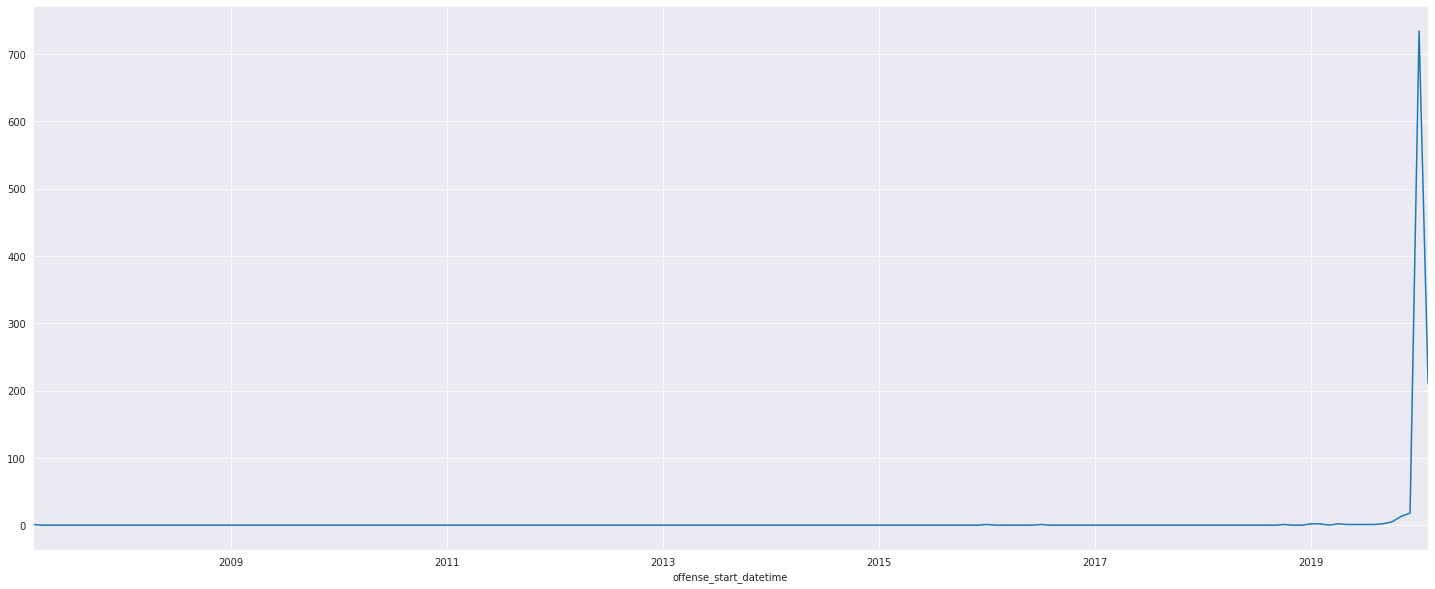

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
police_sea.set_index('offense_start_datetime').resample('M').count()['offense_id'].plot()

###Group A/*B*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


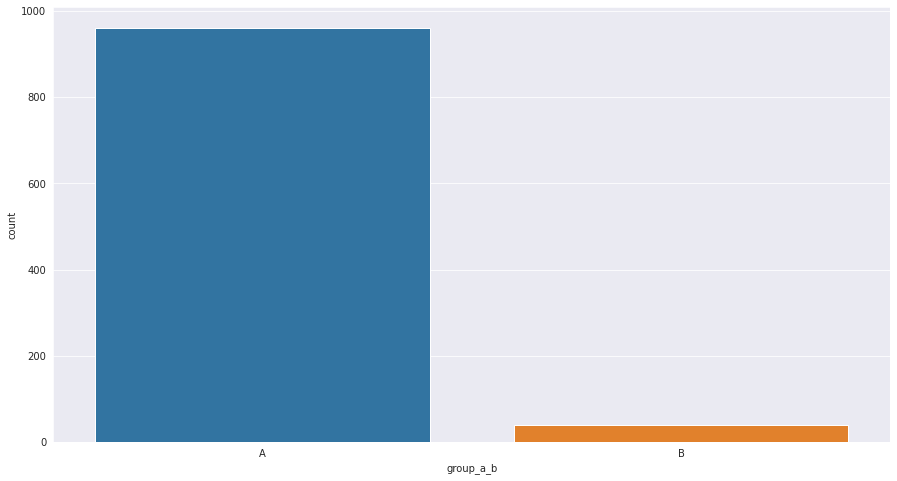

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(police_sea['group_a_b'])

In [ ]:
police_sea[police_sea['group_a_b']=='B']['offense_parent_group'].value_counts()

DRIVING UNDER THE INFLUENCE    36
BAD CHECKS                      2
LIQUOR LAW VIOLATIONS           1
Name: offense_parent_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


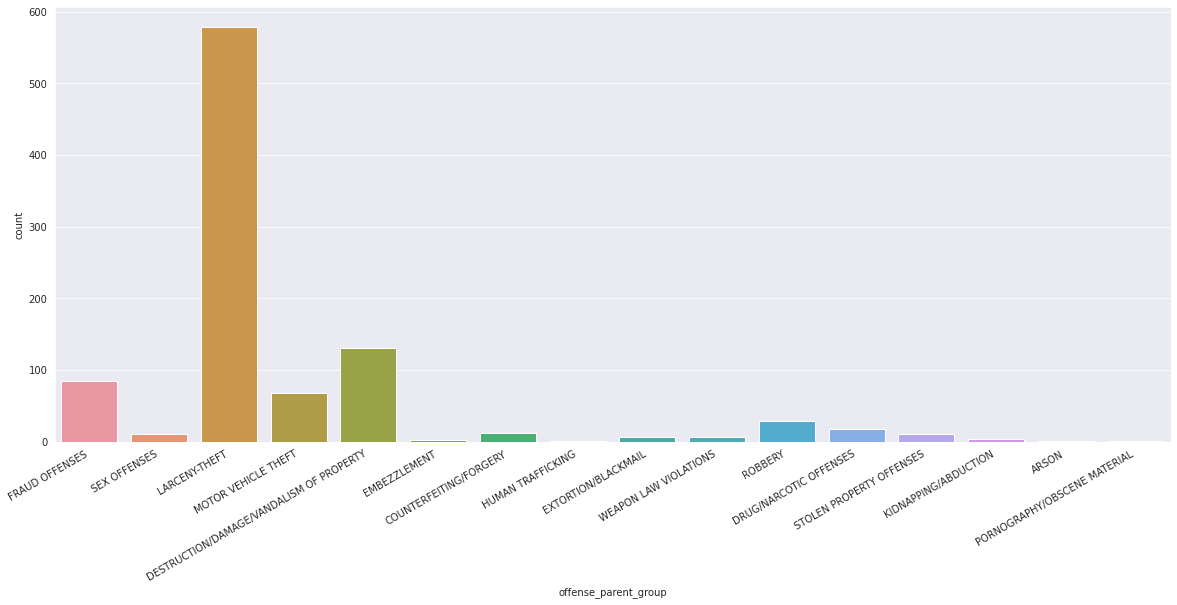

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 30,ha = 'right')

sns.countplot(police_sea[police_sea['group_a_b']=='A']['offense_parent_group'])

In [ ]:
police_sea = police_sea.drop('group_a_b',axis=1)

In [ ]:
police_sea = police_sea.drop(['offense_code','mult_offense'],axis=1)

---

###Crime Categories

In [ ]:
police_sea['crime_against_category'].value_counts()

PROPERTY    922
SOCIETY      63
PERSON       15
Name: crime_against_category, dtype: int64

In [ ]:
police_sea_crime_category = pd.get_dummies(police_sea['crime_against_category'])
police_sea = pd.concat([police_sea,police_sea_crime_category],axis=1)

In [ ]:
police_sea = police_sea.drop('crime_against_category',axis=1) 

---

###Crime Sub Categories

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


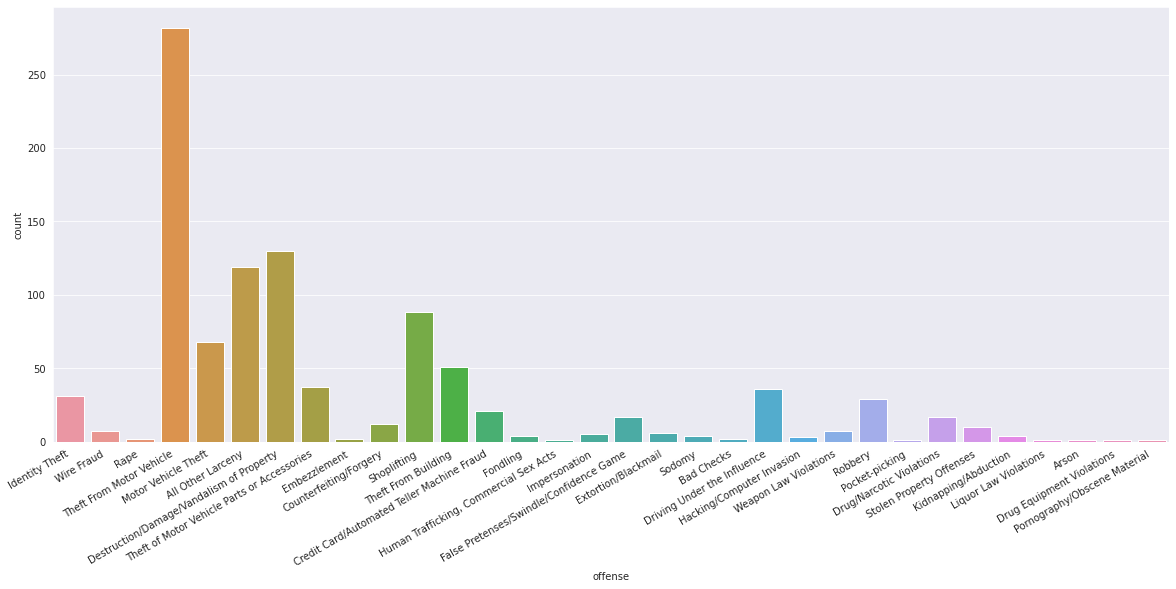

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 30,ha = 'right')
sns.countplot(police_sea['offense'])

---

In [ ]:
pd.DataFrame( police_sea.groupby(['offense_parent_group','offense']).count()['offense_id'])

offense_id
offense_parent_group                     offense                                                
ARSON                                    Arson                                                 1
BAD CHECKS                               Bad Checks                                            2
COUNTERFEITING/FORGERY                   Counterfeiting/Forgery                               12
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY Destruction/Damage/Vandalism of Property            130
DRIVING UNDER THE INFLUENCE              Driving Under the Influence                          36
DRUG/NARCOTIC OFFENSES                   Drug Equipment Violations                             1
                                         Drug/Narcotic Violations                             17
EMBEZZLEMENT                             Embezzlement                                          2
EXTORTION/BLACKMAIL                      Extortion/Blackmail                                   6
FRAUD OFFENSES                           Credit Card/Automated Teller Machine Fraud           21
                                         False Pretenses/Swindle/Confidence Game              17
                                         Hacking/Computer Invasion                             3
                                         Identity Theft                                       31
                                         Impersonation                                         5
                                         Wire Fraud                                            7
HUMAN TRAFFICKING                        Human Trafficking, Commercial Sex Acts                1
KIDNAPPING/ABDUCTION                     Kidnapping/Abduction                                  4
LARCENY-THEFT                            All Other Larceny                                   119
                                         Pocket-picking                                        1
                                         Shoplifting                                          88
                                         Theft From Building                                  51
                                         Theft From Motor Vehicle                            282
                                         Theft of Motor Vehicle Parts or Accessories          37
LIQUOR LAW VIOLATIONS                    Liquor Law Violations                                 1
MOTOR VEHICLE THEFT                      Motor Vehicle Theft                                  68
PORNOGRAPHY/OBSCENE MATERIAL             Pornography/Obscene Material                          1
ROBBERY                                  Robbery                                              29
SEX OFFENSES                             Fondling                                              4
                                         Rape                                                  2
                                         Sodomy                                                4
STOLEN PROPERTY OFFENSES                 Stolen Property Offenses                             10
WEAPON LAW VIOLATIONS                    Weapon Law Violations                                 7

----

###Police Stations

In [ ]:
pd.DataFrame( police_sea.groupby(['sector','precinct','beat']).count()['offense_id'])

offense_id
sector precinct beat            
B      N        B1            24
                B2            41
                B3            21
C      E        C1            10
                C2            14
                C3            19
D      W        D1            20
                D2            31
                D3            23
E      E        E1            25
                E2            26
                E3            21
F      SW       F1            17
                F2            14
                F3            13
G      E        G1            15
                G2            10
                G3            13
J      N        J1            16
                J2            19
                J3            26
K      W        K1            14
                K2            24
                K3            29
L      N        L1             3
                L2            26
                L3             1
M      W        M1            24
                M2            19
                M3            34
N      N        N1            11
                N2            16
                N3             9
O      S        O1            13
                O2             8
                O3            15
Q      W        Q1            20
                Q2            35
                Q3            24
R      S        R1            18
                R2            19
                R3            19
S      S        S1            16
                S2            12
                S3             8
U      N        U1            19
                U2            45
                U3            35
W      SW       W1            17
                W2            32
                W3            17

In [ ]:
police_sea = police_sea.drop('precinct',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


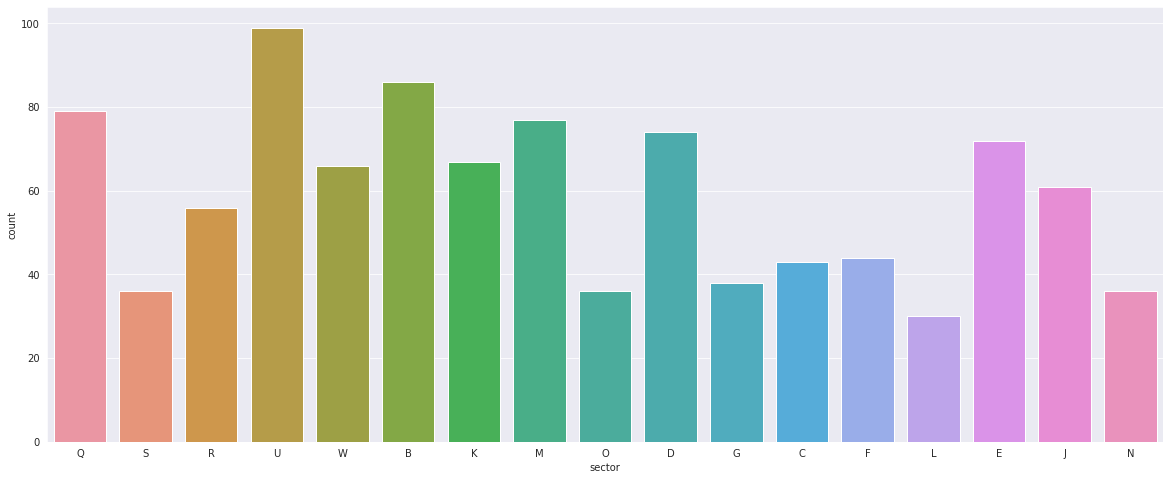

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot( police_sea['sector'])

---

###Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


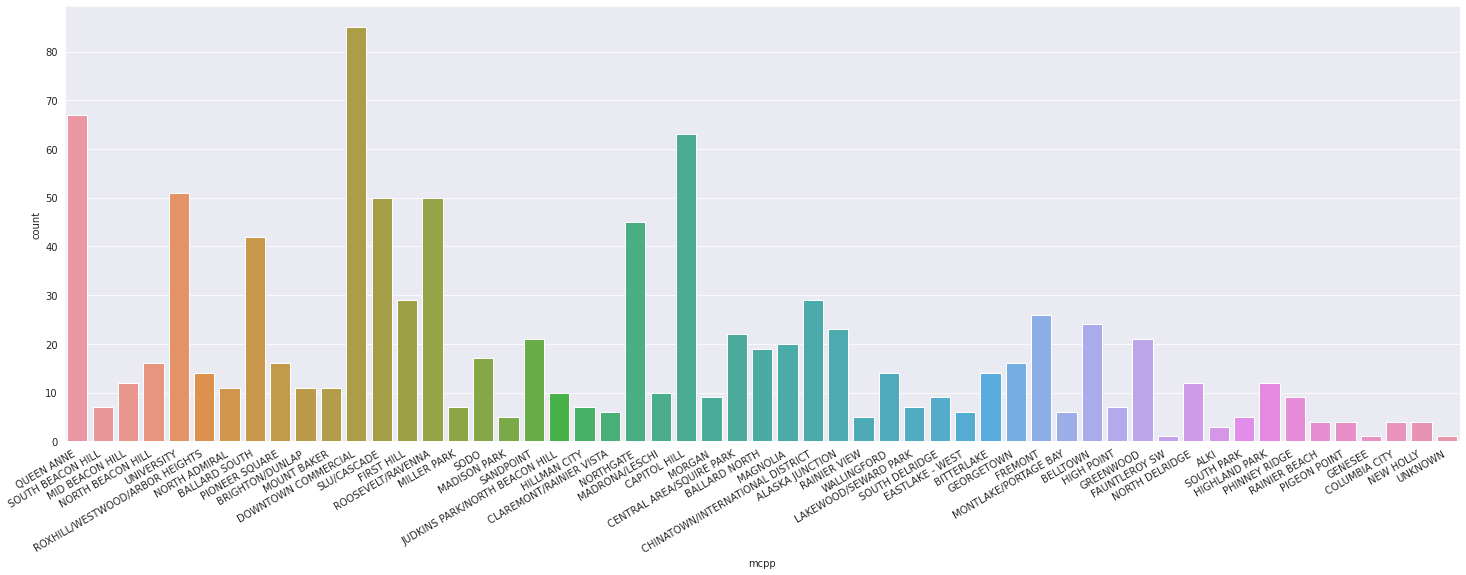

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation = 30,ha = 'right')
sns.countplot(police_sea['mcpp'])

In [ ]:
#police_sea['mcpp'].value_counts()

In [ ]:
police_sea.groupby(['mcpp','_100_block_address']).count()['offense_id']

mcpp             _100_block_address             
ALASKA JUNCTION  36XX BLOCK OF SW SNOQUALMIE ST     4
                 37XX BLOCK OF SW FINDLAY ST        2
                 38XX BLOCK OF 35TH AVE SW          1
                 38XX BLOCK OF 47TH AVE SW          1
                 38XX BLOCK OF CALIFORNIA AVE SW    1
                                                   ..
WALLINGFORD      41XX BLOCK OF ASHWORTH AVE N       1
                 45XX BLOCK OF WALLINGFORD AVE N    1
                 56XX BLOCK OF KIRKWOOD PL N        1
                 N 54TH ST / WALLINGFORD AVE N      1
                 WALLINGFORD AVE N / N 46TH ST      1
Name: offense_id, Length: 806, dtype: int64

In [ ]:
police_sea.groupby(['beat','mcpp']).count()['offense_id']

beat  mcpp                          
B1    BALLARD SOUTH                     24
B2    BALLARD SOUTH                     18
      FREMONT                           19
      PHINNEY RIDGE                      4
B3    FREMONT                            7
                                        ..
W2    NORTH ADMIRAL                      1
      NORTH DELRIDGE                     1
W3    FAUNTLEROY SW                      1
      MORGAN                             7
      ROXHILL/WESTWOOD/ARBOR HEIGHTS     9
Name: offense_id, Length: 116, dtype: int64

In [ ]:
police_sea.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,offense_parent_group,offense,sector,beat,mcpp,_100_block_address,longitude,latitude,PERSON,PROPERTY,SOCIETY
374,2020-901519,12595898394,2007-03-10 23:00:00,2019-06-01 23:59:00,2020-01-31 09:02:16,FRAUD OFFENSES,Identity Theft,Q,Q3,QUEEN ANNE,3XX BLOCK OF 1ST AVE N,-122.355429,47.621519,0,1,0
71,2020-042409,12603235804,2016-01-01 00:01:00,2020-02-03 15:00:00,2020-02-03 16:57:56,FRAUD OFFENSES,Wire Fraud,S,S1,SOUTH BEACON HILL,37XX BLOCK OF S BURNS ST,-122.285120,47.516540,0,1,0
74,2020-042238,12603176263,2016-07-04 21:00:00,NaT,2020-02-03 16:32:56,SEX OFFENSES,Rape,R,R1,MID BEACON HILL,NaN,0.000000,0.000000,1,0,0
456,2020-036600,12566130631,2018-10-13 00:00:00,2018-10-13 23:59:00,2020-01-30 10:47:57,FRAUD OFFENSES,Identity Theft,R,R2,NORTH BEACON HILL,23XX BLOCK OF RAINIER AVE S,-122.301664,47.582954,0,1,0
576,2020-901398,12461441101,2019-01-28 22:15:00,2020-01-28 22:40:00,2020-01-29 11:22:44,LARCENY-THEFT,Theft From Motor Vehicle,U,U2,UNIVERSITY,47XX BLOCK OF BROOKLYN AVE NE,-122.314224,47.664004,0,1,0


In [ ]:
police_sea.loc[:,'report_year'] = police_sea['report_datetime'].apply(lambda x:x.year)
police_sea.loc[:,'report_month'] = police_sea['report_datetime'].apply(lambda x:x.month)
police_sea.loc[:,'report_day'] = police_sea['report_datetime'].apply(lambda x:x.day)
police_sea.loc[:,'report_hour'] = police_sea.loc[:,'report_datetime'].apply(lambda x:x.hour)
police_sea['report_dayofweek'] = police_sea['report_datetime'].apply(lambda x:x.dayofweek)

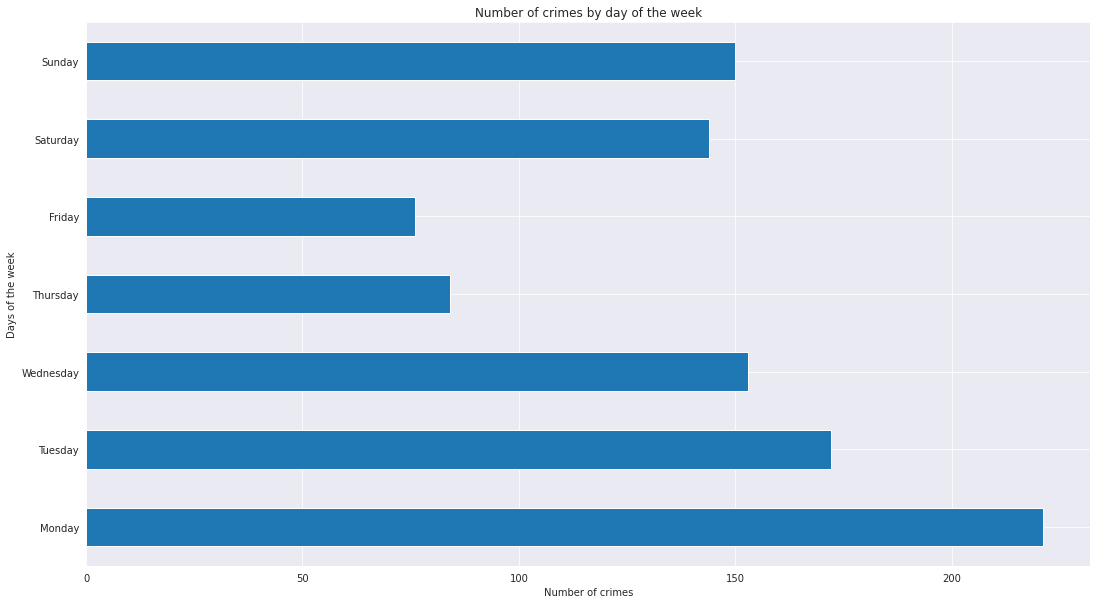

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,10))
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
police_sea.groupby(['report_dayofweek']).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [ ]:
df = police_sea.set_index('report_datetime')

In [ ]:
hour_by_location = df.pivot_table(values='offense_id', index='mcpp', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = df.pivot_table(values='offense_id', index='offense', columns=df.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = df.pivot_table(values='offense_id', index=df.index.hour, columns=df.index.weekday, aggfunc=np.size).fillna(0)
#hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = df.pivot_table(values='offense_id', index='mcpp', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = df.pivot_table(values='offense_id', index='offense', columns=df.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = df.pivot_table(values='offense_id', index='mcpp', columns='offense', aggfunc=np.size).fillna(0)

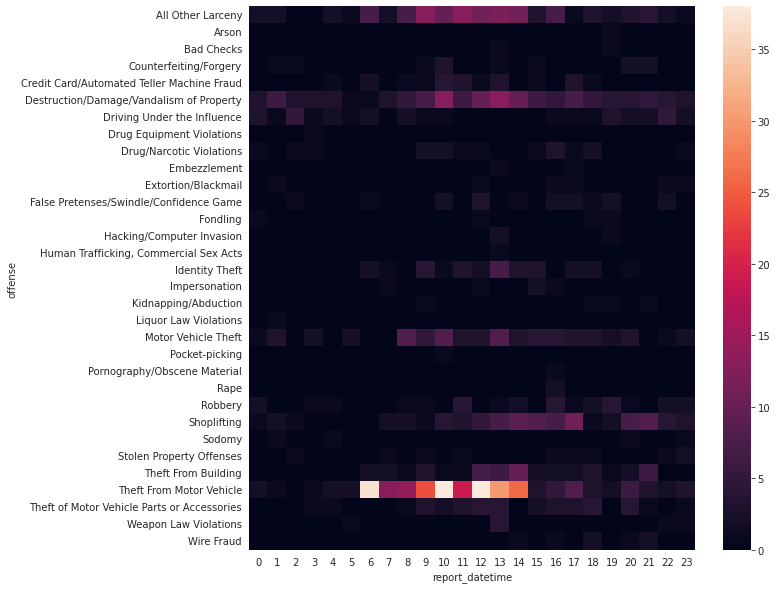

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(hour_by_type)

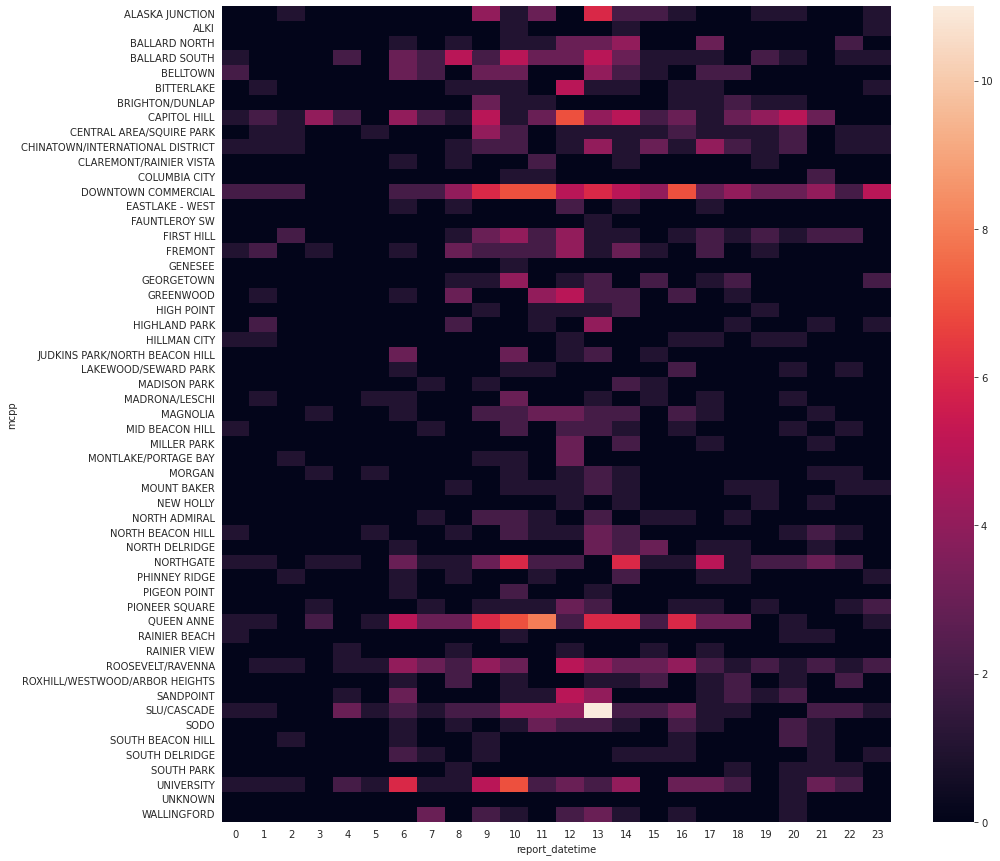

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(hour_by_location)

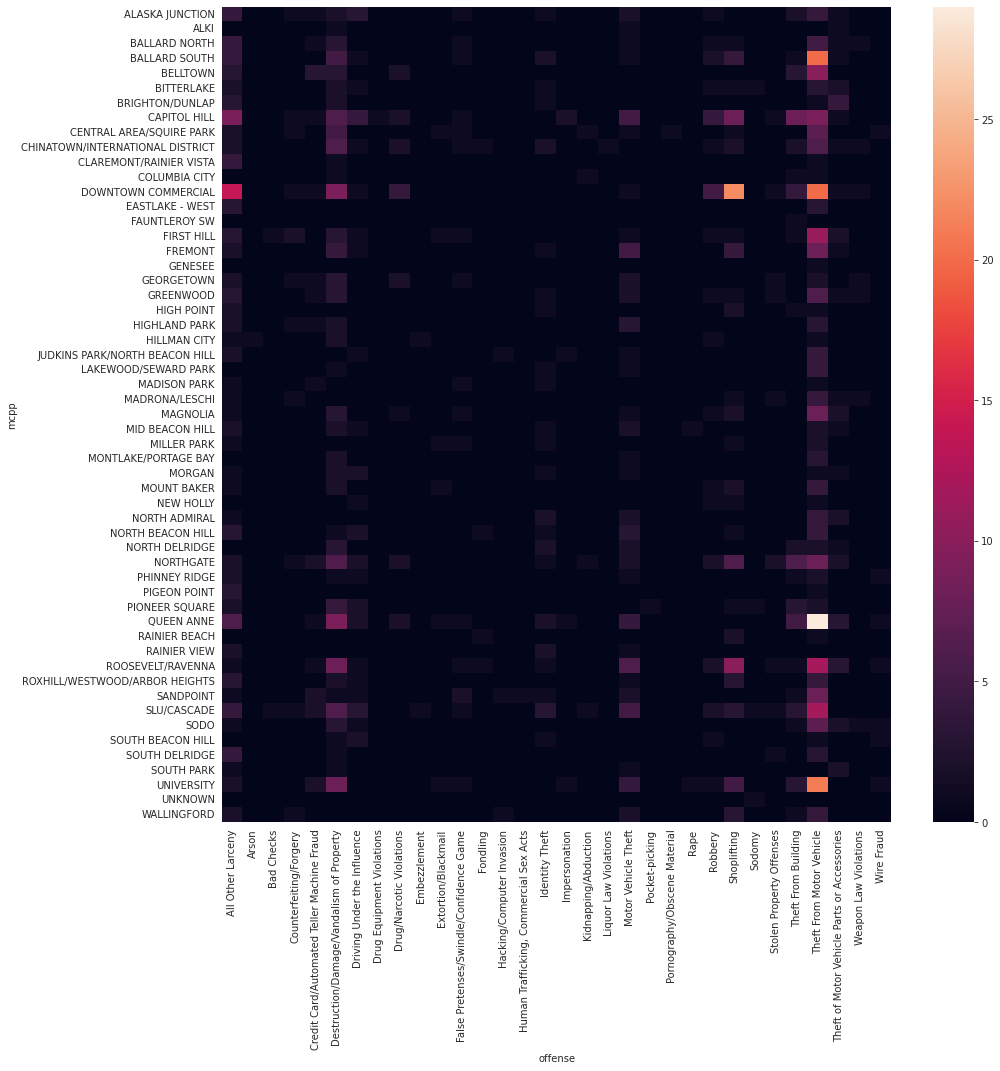

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(location_by_type)

# Feature Engineering

##Time Interval between 

*   start date and end date
*   start date and report date



##Safty Rate

##Crime Risk

##Priority for types of crime

In [ ]:
#police_sea.groupby('offense',as_index=False).agg({'report_year':max,'report_month':max})#.sort_values('date',ascending=False)

#Modeling

clustering on features for location and crime type
use time series to predict crime rate in each cluster
with priority

In [ ]:
police_sea.head()

,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,offense_parent_group,offense,sector,beat,mcpp,_100_block_address,longitude,latitude,PERSON,PROPERTY,SOCIETY,report_year,report_month,report_day,report_hour,report_dayofweek,C,D,E,F,G,J,K,L,M,N,O,Q,R,S,U,W,Arson,Bad Checks,Counterfeiting/Forgery,Credit Card/Automated Teller Machine Fraud,Destruction/Damage/Vandalism of Property,Driving Under the Influence,Drug Equipment Violations,Drug/Narcotic Violations,Embezzlement,Extortion/Blackmail,False Pretenses/Swindle/Confidence Game,Fondling,Hacking/Computer Invasion,"Human Trafficking, Commercial Sex Acts",Identity Theft,Impersonation,Kidnapping/Abduction,Liquor Law Violations,Motor Vehicle Theft,Pocket-picking,Pornography/Obscene Material,Rape,Robbery,Shoplifting,Sodomy,Stolen Property Offenses,Theft From Building,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Weapon Law Violations,Wire Fraud
374,12595898394,2007-03-10 23:00:00,2019-06-01 23:59:00,2020-01-31 09:02:16,FRAUD OFFENSES,Identity Theft,Q,Q3,0,3XX BLOCK OF 1ST AVE N,-122.355429,47.621519,0,1,0,2020,1,31,9,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,12603235804,2016-01-01 00:01:00,2020-02-03 15:00:00,2020-02-03 16:57:56,FRAUD OFFENSES,Wire Fraud,S,S1,1,37XX BLOCK OF S BURNS ST,-122.285120,47.516540,0,1,0,2020,2,3,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
74,12603176263,2016-07-04 21:00:00,NaT,2020-02-03 16:32:56,SEX OFFENSES,Rape,R,R1,2,NaN,0.000000,0.000000,1,0,0,2020,2,3,16,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
456,12566130631,2018-10-13 00:00:00,2018-10-13 23:59:00,2020-01-30 10:47:57,FRAUD OFFENSES,Identity Theft,R,R2,3,23XX BLOCK OF RAINIER AVE S,-122.301664,47.582954,0,1,0,2020,1,30,10,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576,12461441101,2019-01-28 22:15:00,2020-01-28 22:40:00,2020-01-29 11:22:44,LARCENY-THEFT,Theft From Motor Vehicle,U,U2,4,47XX BLOCK OF BROOKLYN AVE NE,-122.314224,47.664004,0,1,0,2020,1,29,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
police_sea['mcpp'] = pd.factorize(police_sea['mcpp'])[0]

In [ ]:
offense_dummy =  pd.get_dummies(police_sea['offense'],drop_first=True)
police_sea = pd.concat([police_sea,offense_dummy],axis=1)

In [ ]:
columns = list(police_sea.columns[12:].values)

In [ ]:
columns.append('mcpp')

In [ ]:
X = police_sea[columns]
y = police_sea['offense']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X.values,y.values)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import math

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

y_pred = model.predict(x_test)
#predictions = [round(value) for value in y_pred]

In [ ]:
accuracy_score(y_test,y_pred)

0.98

In [ ]:
y_test[:10],y_pred[:10]

(array(['Identity Theft', 'Motor Vehicle Theft',
        'Theft From Motor Vehicle',
        'Destruction/Damage/Vandalism of Property', 'Wire Fraud',
        'All Other Larceny', 'Robbery', 'Motor Vehicle Theft',
        'Destruction/Damage/Vandalism of Property',
        'Theft From Motor Vehicle'], dtype=object),
 array(['Identity Theft', 'Motor Vehicle Theft',
        'Theft From Motor Vehicle',
        'Destruction/Damage/Vandalism of Property', 'Wire Fraud',
        'All Other Larceny', 'Robbery', 'Motor Vehicle Theft',
        'Destruction/Damage/Vandalism of Property',
        'Theft From Motor Vehicle'], dtype=object))